In [23]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Display up to 60 columns of a dataframe
pd.set_option('display.max_columns', 60)

# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import pandas_profiling

import ast

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

In [24]:
# Read in data of 2015 into a dataframe 
data2015 = pd.read_csv(filepath_or_buffer=r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\2015-building-energy-benchmarking\2015-building-energy-benchmarking.csv', delimiter=",",low_memory=False)
results = pd.DataFrame()
for idx, row in data2015.iterrows():

    data_dict = ast.literal_eval(row['Location'])
    lat = data_dict['latitude']
    lon = data_dict['longitude']
    need_recode = data_dict['needs_recoding'] 

    normalize = pd.Series(json.loads(data_dict['human_address']))
    row = row.drop('Location')

    cols = list(row.index) + ['Latitude', 'Longitude', 'need_recoding'] + list(normalize.index)
    temp_df = pd.DataFrame([list(row) + [lat, lon, need_recode] + list(normalize)], columns = cols )
    results = results.append(temp_df).reset_index(drop=True)
    

In [25]:
print (results)

      OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
0                 1      2015        NonResidential                  Hotel   
1                 2      2015        NonResidential                  Hotel   
2                 3      2015        NonResidential                  Hotel   
3                 5      2015        NonResidential                  Hotel   
4                 8      2015        NonResidential                  Hotel   
...             ...       ...                   ...                    ...   
3335          50049      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3336          50055      2015  Multifamily MR (5-9)   Mid-Rise Multifamily   
3337          50057      2015  Multifamily HR (10+)  High-Rise Multifamily   
3338          50058      2015  Multifamily LR (1-4)   Low-Rise Multifamily   
3339          50059      2015  Multifamily LR (1-4)   Low-Rise Multifamily   

                    PropertyName TaxParcelIdentificationNumber 

In [26]:
data2015 = results
data2016 = pd.read_csv(filepath_or_buffer=r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\2016-building-energy-benchmarking\2016-building-energy-benchmarking.csv', delimiter=",",low_memory=False)
data = pd.concat([data2015,data2016],sort=False,ignore_index=True)
# Display top of dataframe
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,Latitude,Longitude,need_recoding,address,city,state,zip,Address,City,State,ZipCode,Comments,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,0.0,249.43,2.64,No,NaN,Compliant,NaN,47.61219025,-122.33799744,False,405 OLIVE WAY,SEATTLE,WA,98101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,0.0,263.51,2.38,No,NaN,Compliant,NaN,47.61310583,-122.33335756,False,724 PINE ST,SEATTLE,WA,98101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,47.61334897,-122.33769944,False,1900 5TH AVE,SEATTLE,WA,98101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,47.61421585,-122.33660889,False,620 STEWART ST,SEATTLE,WA,98101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,0.0,507.70,4.02,No,NaN,Compliant,NaN,47.6137544,-122.3409238,False,401 LENORA ST,SEATTLE,WA,98121,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,2015,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),660000560,7,DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,Police Station,88830.0,NaN,NaN,NaN,NaN,NaN,NaN,135.700000,146.900000,313.500000,321.600000,1.205198e+07,1.304526e+07,0.0,2.130921e+06,7.271004e+06,47813.000000,4.781283e+06,0.0,304.62,2.81,No,NaN,Compliant,NaN,47.6164389,-122.33676431,False,810 VIRGINIA ST,SEATTLE,WA,98101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,2015,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,660000825,7,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Hotel,Hotel,81352.0,NaN,NaN,NaN,NaN,NaN,25.0,76.900000,79.600000,149.500000,158.200000,6.252842e+06,6.477493e+06,0.0,7.853420e+05,2.679698e+06,35733.000000,3.573255e+06,0.0,208.46,2.37,No,NaN,Compliant,NaN,47.6141141,-122.33274086,False,1619 9TH AVE,SEATTLE,WA,98101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,2015,NonResidential,Other,PARAMOUNT THEATER,660000955,7,DOWNTOWN,1926,1.0,8.0,102761,0,102

In [27]:
data["Latitude"] = pd.to_numeric(data["Latitude"])
data["Longitude"] = pd.to_numeric(data["Longitude"])
data.dtypes

OSEBuildingID                          int64
DataYear                               int64
BuildingType                          object
PrimaryPropertyType                   object
PropertyName                          object
TaxParcelIdentificationNumber         object
CouncilDistrictCode                    int64
Neighborhood                          object
YearBuilt                              int64
NumberofBuildings                    float64
NumberofFloors                       float64
PropertyGFATotal                       int64
PropertyGFAParking                     int64
PropertyGFABuilding(s)                 int64
ListOfAllPropertyUseTypes             object
LargestPropertyUseType                object
LargestPropertyUseTypeGFA            float64
SecondLargestPropertyUseType          object
SecondLargestPropertyUseTypeGFA      float64
ThirdLargestPropertyUseType           object
ThirdLargestPropertyUseTypeGFA       float64
YearsENERGYSTARCertified              object
ENERGYSTAR

In [6]:
data.profile_report()
profile = data.profile_report(title='Pandas Profiling Report', plot={'histogram': {'bins': 20}})
profile.to_file(output_file=r"C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\output.html")

In [28]:
GHG = pd.concat([data2015['GHGEmissions(MetricTonsCO2e)'].dropna(), data['TotalGHGEmissions'].dropna()]).reindex_like(data)
data = pd.concat([data,GHG], axis=1)
data.columns

Index([                    'OSEBuildingID',
                                'DataYear',
                            'BuildingType',
                     'PrimaryPropertyType',
                            'PropertyName',
           'TaxParcelIdentificationNumber',
                     'CouncilDistrictCode',
                            'Neighborhood',
                               'YearBuilt',
                       'NumberofBuildings',
                          'NumberofFloors',
                        'PropertyGFATotal',
                      'PropertyGFAParking',
                  'PropertyGFABuilding(s)',
               'ListOfAllPropertyUseTypes',
                  'LargestPropertyUseType',
               'LargestPropertyUseTypeGFA',
            'SecondLargestPropertyUseType',
         'SecondLargestPropertyUseTypeGFA',
             'ThirdLargestPropertyUseType',
          'ThirdLargestPropertyUseTypeGFA',
                'YearsENERGYSTARCertified',
                         'ENERGY

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 56 columns):
OSEBuildingID                        6716 non-null int64
DataYear                             6716 non-null int64
BuildingType                         6716 non-null object
PrimaryPropertyType                  6716 non-null object
PropertyName                         6716 non-null object
TaxParcelIdentificationNumber        6714 non-null object
CouncilDistrictCode                  6716 non-null int64
Neighborhood                         6716 non-null object
YearBuilt                            6716 non-null int64
NumberofBuildings                    6708 non-null float64
NumberofFloors                       6708 non-null float64
PropertyGFATotal                     6716 non-null int64
PropertyGFAParking                   6716 non-null int64
PropertyGFABuilding(s)               6716 non-null int64
ListOfAllPropertyUseTypes            6580 non-null object
LargestPropertyUseType      

In [30]:
# Dropping irrelevant columns and merging for 2015 and 2016 for Emissions of CO2
data.rename(columns={0 : 'GHGEmIn'}, inplace= True)
datawithscore=data.copy()
datawithscore.drop(columns=['GHGEmissionsIntensity','TotalGHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)'
                   ,'GHGEmissions(MetricTonsCO2e)'
                   ,'OSEBuildingID'
                   ,'TaxParcelIdentificationNumber'
                   ,'SecondLargestPropertyUseType'
                   ,'SecondLargestPropertyUseTypeGFA'
                   ,'ThirdLargestPropertyUseType'
                   ,'ThirdLargestPropertyUseTypeGFA'
                   ,'YearsENERGYSTARCertified','SiteEUI(kBtu/sf)',
                      'SiteEUIWN(kBtu/sf)',
                      'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)','SteamUse(kBtu)',
                        'Electricity(kWh)',
                       'Electricity(kBtu)',
                      'NaturalGas(therms)',
                        'NaturalGas(kBtu)',
                      'OtherFuelUse(kBtu)','Comments','Comment','ComplianceStatus','Outlier','DefaultData','need_recoding',
                                 'address',
                                    'city',
                                   'state',
                                     'zip',
                                 'Address',
                                    'City',
                                   'State',
                                 'ZipCode','DataYear','CouncilDistrictCode'], inplace= True)

data.drop(columns=['GHGEmissionsIntensity','TotalGHGEmissions','GHGEmissionsIntensity(kgCO2e/ft2)'
                   ,'GHGEmissions(MetricTonsCO2e)'
                   ,'OSEBuildingID'
                   ,'TaxParcelIdentificationNumber'
                   ,'SecondLargestPropertyUseType'
                   ,'SecondLargestPropertyUseTypeGFA'
                   ,'ThirdLargestPropertyUseType'
                   ,'ThirdLargestPropertyUseTypeGFA'
                   ,'YearsENERGYSTARCertified','SiteEUI(kBtu/sf)',
                      'SiteEUIWN(kBtu/sf)',
                      'SourceEUI(kBtu/sf)',
                    'SourceEUIWN(kBtu/sf)','SteamUse(kBtu)',
                        'Electricity(kWh)',
                       'Electricity(kBtu)',
                      'NaturalGas(therms)',
                        'NaturalGas(kBtu)',
                      'OtherFuelUse(kBtu)','Comments','Comment','ComplianceStatus','Outlier','DefaultData','need_recoding',
                                 'address',
                                    'city',
                                   'state',
                                     'zip',
                                 'Address',
                                    'City',
                                   'State',
                                 'ZipCode','ENERGYSTARScore','DataYear','CouncilDistrictCode'], inplace= True)


In [10]:
datawithscore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 18 columns):
BuildingType                 6716 non-null object
PrimaryPropertyType          6716 non-null object
PropertyName                 6716 non-null object
Neighborhood                 6716 non-null object
YearBuilt                    6716 non-null int64
NumberofBuildings            6708 non-null float64
NumberofFloors               6708 non-null float64
PropertyGFATotal             6716 non-null int64
PropertyGFAParking           6716 non-null int64
PropertyGFABuilding(s)       6716 non-null int64
ListOfAllPropertyUseTypes    6580 non-null object
LargestPropertyUseType       6560 non-null object
LargestPropertyUseTypeGFA    6560 non-null float64
ENERGYSTARScore              5093 non-null float64
SiteEnergyUse(kBtu)          6701 non-null float64
SiteEnergyUseWN(kBtu)        6700 non-null float64
Latitude                     6716 non-null float64
Longitude                    6716 non-nu

In [11]:
# Replace all occurrences of Not Available with numpy not a number
datawithscore = datawithscore.replace({'Not Available': np.nan})

# Iterate through the columns
for col in list(datawithscore.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        datawithscore[col] = datawithscore[col].astype(float)

In [12]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [13]:
missing_values_table(datawithscore)

Your selected dataframe has 18 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
ENERGYSTARScore,1623,24.2
LargestPropertyUseType,156,2.3
LargestPropertyUseTypeGFA,156,2.3
ListOfAllPropertyUseTypes,136,2.0
SiteEnergyUseWN(kBtu),16,0.2
SiteEnergyUse(kBtu),15,0.2
NumberofBuildings,8,0.1
NumberofFloors,8,0.1


In [14]:
# Get the columns with > 50% missing
missing_df = missing_values_table(datawithscore);
missing_columns= list(missing_df[missing_df['% of Total Values'] > 50].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 18 columns.
There are 8 columns that have missing values.
We will remove 0 columns.


In [15]:
# Drop the columns
datawithscore = datawithscore.drop(columns = list(missing_columns))

In [33]:
datawithscore

,BuildingType,PrimaryPropertyType,PropertyName,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Latitude,Longitude,GHGEmIn
0,NonResidential,Hotel,MAYFLOWER PARK HOTEL,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,65.0,6.981428e+06,7.097539e+06,47.612190,-122.337997,249.43
1,NonResidential,Hotel,PARAMOUNT HOTEL,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,51.0,8.354235e+06,8.765788e+06,47.613106,-122.333358,263.51
2,NonResidential,Hotel,WESTIN HOTEL,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,18.0,7.313066e+07,7.550627e+07,47.613349,-122.337699,2061.48
3,NonResidential,Hotel,HOTEL MAX,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,1.0,2.822932e+07,2.836344e+07,47.614216,-122.336609,1936.34
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,67.0,1.482910e+07,1.507824e+07,47.613754,-122.340924,507.70
5,Nonresidential COS,Other,WEST PRECINCT (SEATTLE POLICE),DOWNTOWN,1999,1.0,2.0,97288,37198,60090,Police Station,Police Station,88830.0,NaN,1.205198e+07,1.304526e+07,47.616439,-122.336764,304.62
6,NonResidential,Hotel,CAMLIN WORLDMARK HOTEL,DOWNTOWN,1926,1.0,11.0,83008,0,83008,Hotel,Hotel,81352.0,25.0,6.252842e+06,6.477493e+06,47.614114,-122.332741,208.46
7,NonResidential,Other,PARAMOUNT THEATER,DOWNTOWN,1926,1.0,8.0,102761,0,102761,Other - Entertainment/Public Assembly,Other - Entertainment/Public Assembly,102761.0,NaN,6.426022e+06,7.380086e+06,47.612902,-122.331309,199.99
8,NonResidential,Hotel,COURTYARD BY MARRIOTT - ALASKA BLDG SEATTLE,DOWNTOWN,1904,1.0,15.0,163984,0,163984,Hotel,Hotel,163984.0,46.0,1.263374e+07,1.358902e+07,47.602589,-122.332553,331.61
9,Multifamily MR (5-9),Mid-Rise Multifamily,LYON BUILDING,DOWNTOWN,1910,1.0,6.0,63712,1496,62216,Multifamily Housing,Multifamily Housing,56132.0,2.0,4.587231e+06,5.203458e+06,47.602784,-122.332149,170.00


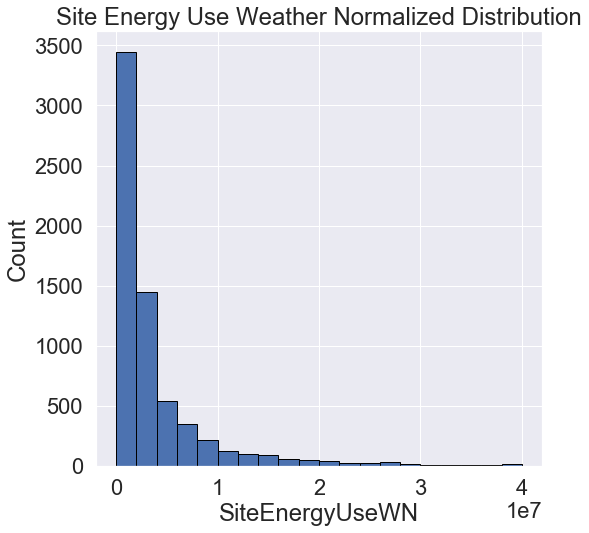

In [31]:
# Histogram Plot of SiteEnergyUseWN(kBtu)
figsize(8, 8)
plt.hist(datawithscore['SiteEnergyUseWN(kBtu)'].dropna(), bins = 20, edgecolor = 'black',range = (0, 40000000));
plt.xlabel('SiteEnergyUseWN'); 
plt.ylabel('Count'); plt.title('Site Energy Use Weather Normalized Distribution');

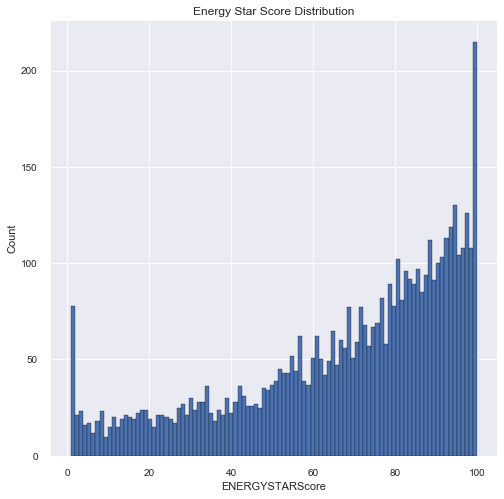

In [20]:
# Histogram Plot of SiteEnergyUseWN(kBtu)
figsize(8, 8)
plt.hist(datawithscore['ENERGYSTARScore'].dropna(), bins = 100, edgecolor = 'black');
plt.xlabel('ENERGYSTARScore'); 
plt.ylabel('Count'); plt.title('Energy Star Score Distribution');

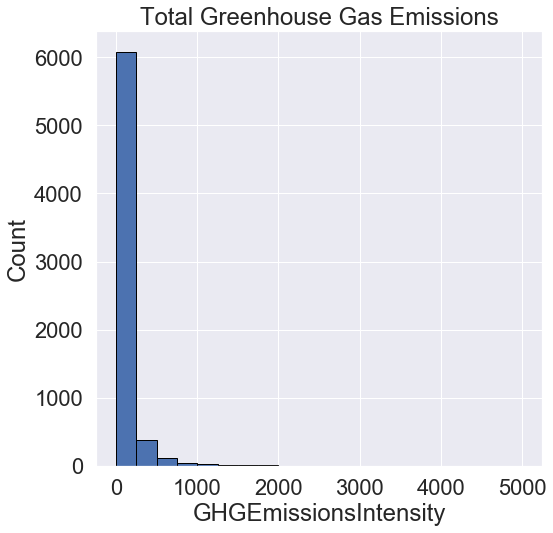

In [32]:
# Histogram Plot of GHGEmissionsIntensity
figsize(8, 8)
plt.hist(datawithscore['GHGEmIn'].dropna(), bins = 20, edgecolor = 'black',range = (0, 5000));
plt.xlabel('GHGEmissionsIntensity'); 
plt.ylabel('Count'); plt.title('Total Greenhouse Gas Emissions');

In [23]:
datawithscore
datawithscore.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\data_merged_with_score_2015_2016.csv', index = False)

In [54]:
# Create a list of buildings with more than 100 measurements
types = datawithscore.dropna(subset=['SiteEnergyUseWN(kBtu)'])
types = types['LargestPropertyUseType'].value_counts()
types = list(types[types.values > 300].index)

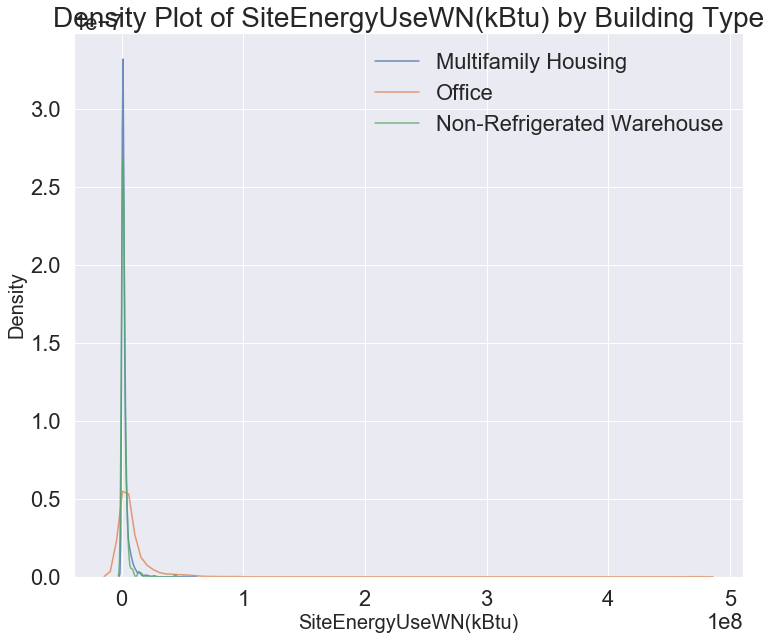

In [55]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = datawithscore[datawithscore['LargestPropertyUseType'] == b_type]
    
    # Density plot of Site EnergyUseWN
    sns.kdeplot(subset['SiteEnergyUseWN(kBtu)'].dropna(),
               label = b_type, shade = False, 
                 alpha = 0.8);
    
# label the plot
plt.xlabel('SiteEnergyUseWN(kBtu)', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of SiteEnergyUseWN(kBtu) by Building Type', size = 28);

In [26]:
# Create a list of neighborhoods with more than 200 observations
Neighborhoods = datawithscore.dropna(subset=['SiteEnergyUseWN(kBtu)'])
Neighborhoods = Neighborhoods['Neighborhood'].value_counts()
Neighborhoods = list(Neighborhoods[Neighborhoods.values > 200].index)

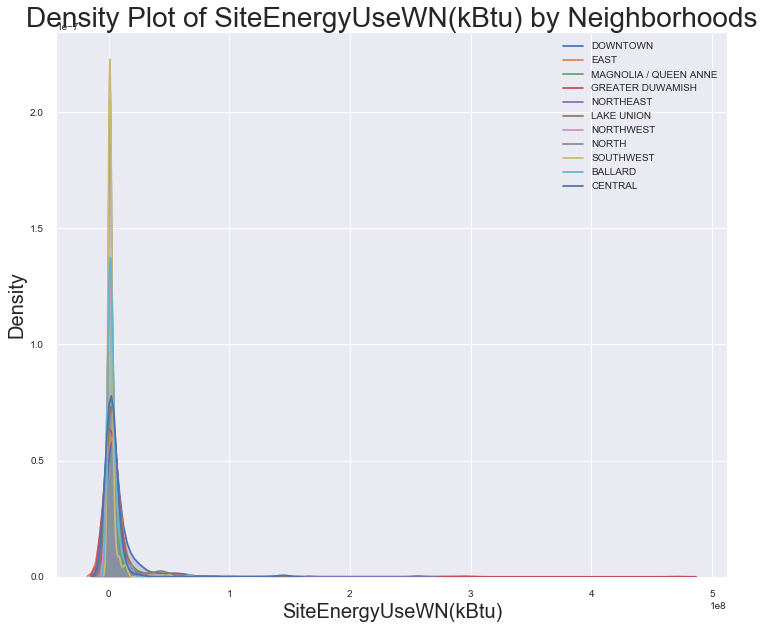

In [27]:
# Plot of distribution of scores for neighborhoods
figsize(12, 10)

# Plot each neighborhoods distribution of SiteEnergyUseWN
for Neighborhood in Neighborhoods:
    # Select the building neighborhood
    subset = datawithscore[datawithscore['Neighborhood'] == Neighborhood]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['SiteEnergyUseWN(kBtu)'].dropna(),
               label = Neighborhood,shade=True);
    
# label the plot
plt.xlabel('SiteEnergyUseWN(kBtu)', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of SiteEnergyUseWN(kBtu) by Neighborhoods', size = 28);

In [28]:
# Find all correlations and sort 
correlations_data = datawithscore.corr()['SiteEnergyUseWN(kBtu)'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

ENERGYSTARScore             -0.092568
Latitude                    -0.036575
Longitude                    0.029816
YearBuilt                    0.074812
NumberofBuildings            0.112309
PropertyGFAParking           0.273724
NumberofFloors               0.308379
PropertyGFABuilding(s)       0.481245
LargestPropertyUseTypeGFA    0.488806
PropertyGFATotal             0.494333
SiteEnergyUse(kBtu)          0.804625
GHGEmIn                      0.871849
SiteEnergyUseWN(kBtu)        1.000000
Name: SiteEnergyUseWN(kBtu), dtype: float64 

ENERGYSTARScore             -0.092568
Latitude                    -0.036575
Longitude                    0.029816
YearBuilt                    0.074812
NumberofBuildings            0.112309
PropertyGFAParking           0.273724
NumberofFloors               0.308379
PropertyGFABuilding(s)       0.481245
LargestPropertyUseTypeGFA    0.488806
PropertyGFATotal             0.494333
SiteEnergyUse(kBtu)          0.804625
GHGEmIn                      0.871849
Site

In [29]:
# Create a list of buildings with more than 100 measurements
types = datawithscore.dropna(subset=['GHGEmIn'])
types = types['LargestPropertyUseType'].value_counts()
types = list(types[types.values > 100].index)

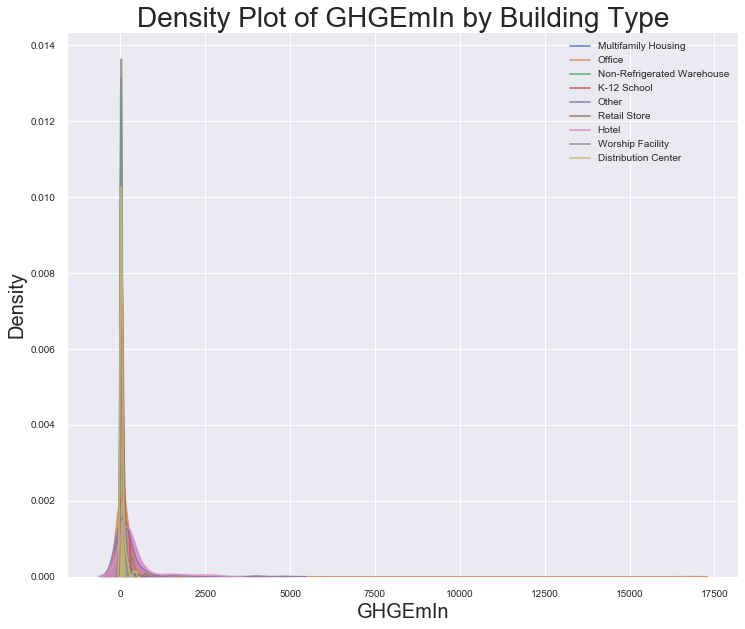

In [30]:
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = datawithscore[datawithscore['LargestPropertyUseType'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['GHGEmIn'].dropna(),
               label = b_type, shade = True, alpha = 0.8);
    
# label the plot
plt.xlabel('GHGEmIn', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of GHGEmIn by Building Type', size = 28);

In [31]:
# Create a list of neighborhoods with more than 100 observations
Neighborhoods = datawithscore.dropna(subset=['GHGEmIn'])
Neighborhoods = Neighborhoods['Neighborhood'].value_counts()
Neighborhoods = list(Neighborhoods[Neighborhoods.values > 100].index)

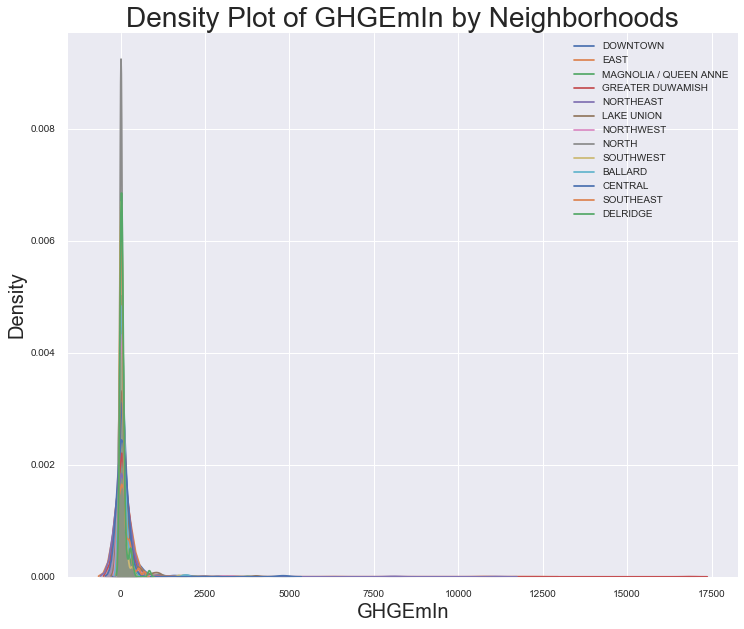

In [32]:
# Plot of distribution of scores for neighborhoods
figsize(12, 10)

# Plot each neighborhoods distribution of scores
for Neighborhood in Neighborhoods:
    # Select the building neighborhood
    subset = datawithscore[datawithscore['Neighborhood'] == Neighborhood]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['GHGEmIn'].dropna(),
               label = Neighborhood,shade=True);
    
# label the plot
plt.xlabel('GHGEmIn', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of GHGEmIn by Neighborhoods', size = 28);

In [33]:
# Find all correlations and sort 
correlations_data = datawithscore.corr()['GHGEmIn'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

ENERGYSTARScore             -0.099041
Latitude                    -0.023227
YearBuilt                    0.022363
Longitude                    0.035013
PropertyGFAParking           0.120979
NumberofFloors               0.158166
NumberofBuildings            0.338028
PropertyGFATotal             0.526399
PropertyGFABuilding(s)       0.545750
LargestPropertyUseTypeGFA    0.577328
SiteEnergyUse(kBtu)          0.868754
SiteEnergyUseWN(kBtu)        0.871849
GHGEmIn                      1.000000
Name: GHGEmIn, dtype: float64 

ENERGYSTARScore             -0.099041
Latitude                    -0.023227
YearBuilt                    0.022363
Longitude                    0.035013
PropertyGFAParking           0.120979
NumberofFloors               0.158166
NumberofBuildings            0.338028
PropertyGFATotal             0.526399
PropertyGFABuilding(s)       0.545750
LargestPropertyUseTypeGFA    0.577328
SiteEnergyUse(kBtu)          0.868754
SiteEnergyUseWN(kBtu)        0.871849
GHGEmIn           

In [34]:
# Select the numeric columns
numeric_subset = datawithscore.select_dtypes('number')

# Select the categorical columns
categorical_subset = datawithscore[['Neighborhood', 'LargestPropertyUseType']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the SiteEnergyUseWN(kBtu) 
correlations_SiteEnergyUseWN = features.corr()['SiteEnergyUseWN(kBtu)'].dropna().sort_values()

In [35]:
features

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Latitude,Longitude,GHGEmIn,Neighborhood_BALLARD,Neighborhood_Ballard,Neighborhood_CENTRAL,Neighborhood_Central,Neighborhood_DELRIDGE,Neighborhood_DELRIDGE NEIGHBORHOODS,Neighborhood_DOWNTOWN,Neighborhood_Delridge,Neighborhood_EAST,Neighborhood_GREATER DUWAMISH,Neighborhood_LAKE UNION,Neighborhood_MAGNOLIA / QUEEN ANNE,Neighborhood_NORTH,Neighborhood_NORTHEAST,Neighborhood_NORTHWEST,Neighborhood_North,Neighborhood_Northwest,...,LargestPropertyUseType_Other - Entertainment/Public Assembly,LargestPropertyUseType_Other - Lodging/Residential,LargestPropertyUseType_Other - Mall,LargestPropertyUseType_Other - Public Services,LargestPropertyUseType_Other - Recreation,LargestPropertyUseType_Other - Restaurant/Bar,LargestPropertyUseType_Other - Services,LargestPropertyUseType_Other - Utility,LargestPropertyUseType_Other/Specialty Hospital,LargestPropertyUseType_Outpatient Rehabilitation/Physical Therapy,LargestPropertyUseType_Parking,LargestPropertyUseType_Performing Arts,"LargestPropertyUseType_Personal Services (Health/Beauty, Dry Cleaning, etc)",LargestPropertyUseType_Police Station,LargestPropertyUseType_Pre-school/Daycare,LargestPropertyUseType_Prison/Incarceration,LargestPropertyUseType_Refrigerated Warehouse,"LargestPropertyUseType_Repair Services (Vehicle, Shoe, Locksmith, etc)",LargestPropertyUseType_Residence Hall/Dormitory,LargestPropertyUseType_Residential Care Facility,LargestPropertyUseType_Restaurant,LargestPropertyUseType_Retail Store,LargestPropertyUseType_Self-Storage Facility,LargestPropertyUseType_Senior Care Community,LargestPropertyUseType_Social/Meeting Hall,LargestPropertyUseType_Strip Mall,LargestPropertyUseType_Supermarket/Grocery Store,LargestPropertyUseType_Urgent Care/Clinic/Other Outpatient,LargestPropertyUseType_Wholesale Club/Supercenter,LargestPropertyUseType_Worship Facility
0,1927,1.0,12.0,88434,0,88434,88434.0,65.0,6.981428e+06,7.097539e+06,47.612190,-122.337997,249.43,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1996,1.0,11.0,103566,15064,88502,83880.0,51.0,8.354235e+06,8.765788e+06,47.613106,-122.333358,263.51,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1969,1.0,41.0,961990,0,961990,757243.0,18.0,7.313066e+07,7.550627e+07,47.613349,-122.337699,2061.48,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1926,1.0,10.0,61320,0,61320,61320.0,1.0,2.822932e+07,2.836344e+07,47.614216,-122.336609,1936.34,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1980,1.0,18.0,119890,12460,107430,123445.0,67.0,1.482910e+07,1.507824e+07,47.613754,-122.340924,507.70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1999,1.0,2.0,97288,37198,60090,88830.0,NaN,1.205198e+07,1.304526e+07,47.616439,-122.336764,304.62,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1926,1.0,11.0,83008,0,83008,81352.0,25.0,6.252842e+06,6.477493e+06,47.614114,-122.332741,208.46,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1926,1.0,8.0,102761,0,102761,102761.0,NaN,6.426022e+06,7.380086e+06,47.612902,-122.331309,199.99,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1904,1.0,15.0,163984,0,163984,163984.0,46.0,1.263374e+07,1.358902e+07,47.602589,-122.332553,331.61,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1910,1.0,6.0,63712,1496,62216,56132.0,2.0,4.587231e+06,5.203458e+06,47.602784,-122.332149,170.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
# Display most negative correlations
correlations_SiteEnergyUseWN.head(15)

LargestPropertyUseType_Multifamily Housing          -0.180076
ENERGYSTARScore                                     -0.092568
LargestPropertyUseType_Non-Refrigerated Warehouse   -0.053420
Neighborhood_MAGNOLIA / QUEEN ANNE                  -0.045207
Neighborhood_SOUTHWEST                              -0.044672
LargestPropertyUseType_Worship Facility             -0.037961
Latitude                                            -0.036575
Neighborhood_NORTH                                  -0.033766
Neighborhood_NORTHWEST                              -0.026979
LargestPropertyUseType_Self-Storage Facility        -0.026328
LargestPropertyUseType_K-12 School                  -0.025701
LargestPropertyUseType_Distribution Center          -0.023234
Neighborhood_BALLARD                                -0.022233
Neighborhood_SOUTHEAST                              -0.019517
Neighborhood_NORTHEAST                              -0.018898
Name: SiteEnergyUseWN(kBtu), dtype: float64

In [37]:
# Display most positive correlations
correlations_SiteEnergyUseWN.tail(15)

LargestPropertyUseType_Hotel                                    0.075356
LargestPropertyUseType_Office                                   0.084634
LargestPropertyUseType_Laboratory                               0.087882
NumberofBuildings                                               0.112309
Neighborhood_DOWNTOWN                                           0.133687
LargestPropertyUseType_Data Center                              0.232237
PropertyGFAParking                                              0.273724
NumberofFloors                                                  0.308379
LargestPropertyUseType_Hospital (General Medical & Surgical)    0.479705
PropertyGFABuilding(s)                                          0.481245
LargestPropertyUseTypeGFA                                       0.488806
PropertyGFATotal                                                0.494333
SiteEnergyUse(kBtu)                                             0.804625
GHGEmIn                                            

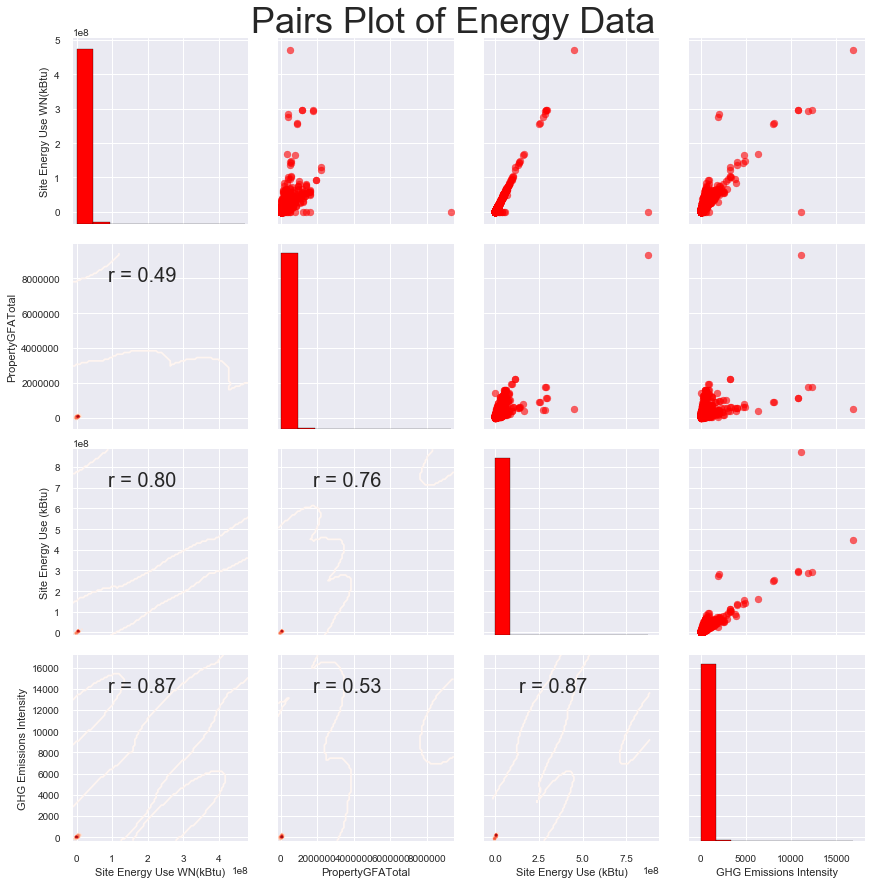

In [38]:
# Extract the columns to  plot
plot_data = features[['SiteEnergyUseWN(kBtu)', 'PropertyGFATotal', 
                      'SiteEnergyUse(kBtu)', 
                      'GHGEmIn']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'SiteEnergyUseWN(kBtu)': 'Site Energy Use WN(kBtu)', 
                                        'SiteEnergyUse(kBtu)': 'Site Energy Use (kBtu)',
                                        'GHGEmIn': 'GHG Emissions Intensity'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

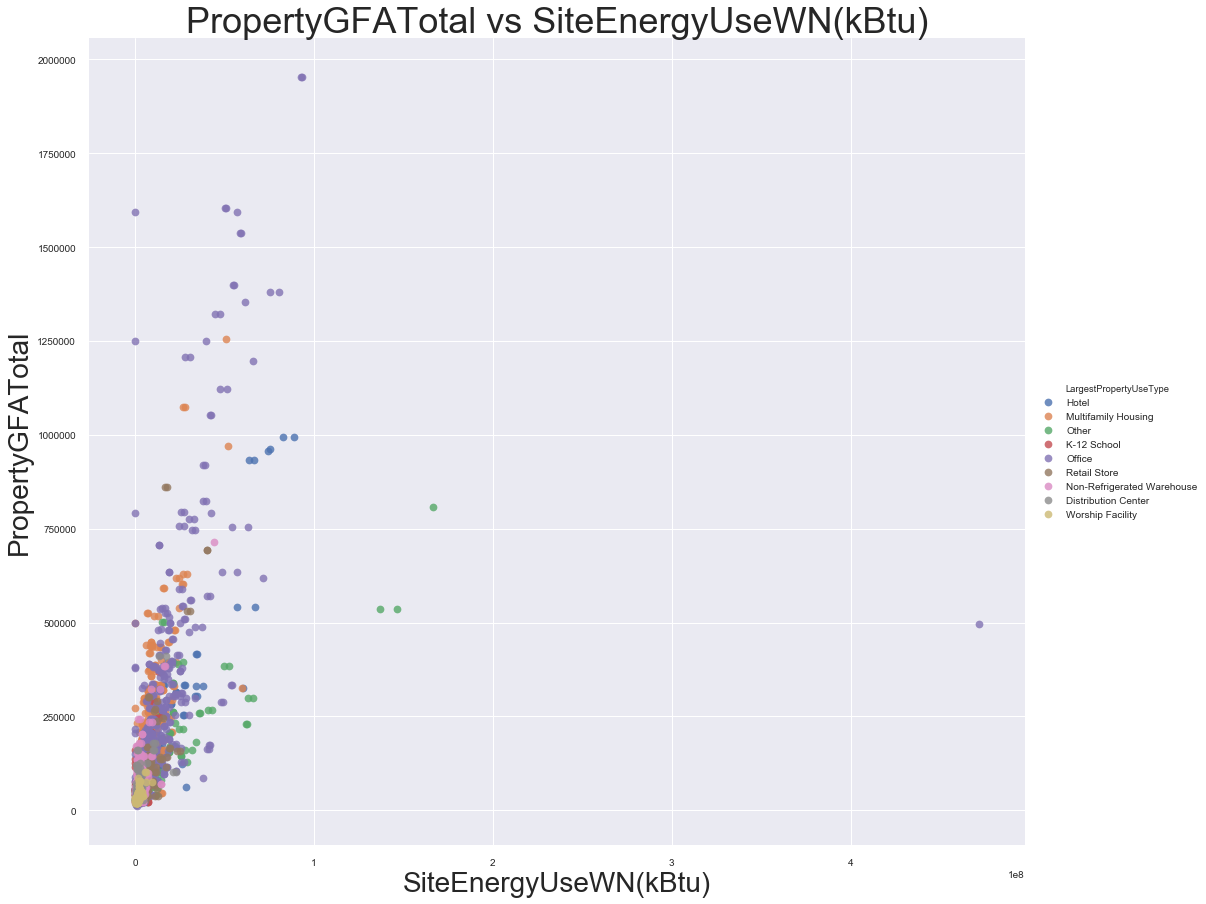

In [39]:
figsize(12, 10)

# Extract the building types
features['LargestPropertyUseType'] = datawithscore.dropna(subset = ['PropertyGFATotal'])['LargestPropertyUseType']

# Limit to building types with more than 100 observations (from previous code)
features = features[features['LargestPropertyUseType'].isin(types)]

# Use seaborn to plot a scatterplot of PropertyGFATotal vs Log Source EUI
sns.lmplot('SiteEnergyUseWN(kBtu)', 'PropertyGFATotal', 
          hue = 'LargestPropertyUseType', data = features,
          scatter_kws = {'alpha': 0.8, 's': 60}, fit_reg = False,
          height = 12, aspect = 1.2);

# Plot labeling
plt.xlabel("SiteEnergyUseWN(kBtu)", size = 28)
plt.ylabel('PropertyGFATotal', size = 28)
plt.title('PropertyGFATotal vs SiteEnergyUseWN(kBtu)', size = 36);

In [40]:
# Select the numeric columns
features = datawithscore.select_dtypes('number')
        
features

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Latitude,Longitude,GHGEmIn
0,1927,1.0,12.0,88434,0,88434,88434.0,65.0,6.981428e+06,7.097539e+06,47.612190,-122.337997,249.43
1,1996,1.0,11.0,103566,15064,88502,83880.0,51.0,8.354235e+06,8.765788e+06,47.613106,-122.333358,263.51
2,1969,1.0,41.0,961990,0,961990,757243.0,18.0,7.313066e+07,7.550627e+07,47.613349,-122.337699,2061.48
3,1926,1.0,10.0,61320,0,61320,61320.0,1.0,2.822932e+07,2.836344e+07,47.614216,-122.336609,1936.34
4,1980,1.0,18.0,119890,12460,107430,123445.0,67.0,1.482910e+07,1.507824e+07,47.613754,-122.340924,507.70
5,1999,1.0,2.0,97288,37198,60090,88830.0,NaN,1.205198e+07,1.304526e+07,47.616439,-122.336764,304.62
6,1926,1.0,11.0,83008,0,83008,81352.0,25.0,6.252842e+06,6.477493e+06,47.614114,-122.332741,208.46
7,1926,1.0,8.0,102761,0,102761,102761.0,NaN,6.426022e+06,7.380086e+06,47.612902,-122.331309,199.99
8,1904,1.0,15.0,163984,0,163984,163984.0,46.0,1.263374e+07,1.358902e+07,47.602589,-122.332553,331.61
9,1910,1.0,6.0,63712,1496,62216,56132.0,2.0,4.587231e+06,5.203458e+06,47.602784,-122.332149,170.00


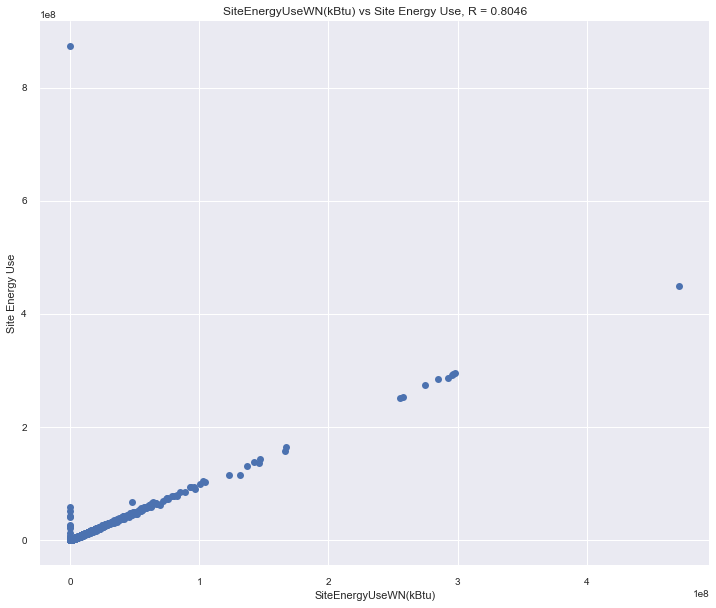

In [41]:
plot_data = datawithscore[['SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)']].dropna()

plt.plot(plot_data['SiteEnergyUseWN(kBtu)'], plot_data['SiteEnergyUse(kBtu)'], 'bo')
plt.xlabel('SiteEnergyUseWN(kBtu)'); plt.ylabel('Site Energy Use')
plt.title('SiteEnergyUseWN(kBtu) vs Site Energy Use, R = %0.4f' % np.corrcoef(datawithscore[['SiteEnergyUseWN(kBtu)', 'SiteEnergyUse(kBtu)']].dropna(), rowvar=False)[0][1]);

In [42]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between GHGEmIn
    y = x['GHGEmIn']
    z = x['SiteEnergyUseWN(kBtu)']
    #s = x['ENERGYSTARScore']
    x = x.drop(columns = ['GHGEmIn'])
    x = x.drop(columns = ['SiteEnergyUseWN(kBtu)'])
    #x = x.drop(columns = ['ENERGYSTARScore'] )
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
        
    # Add the GHGEmIn and SiteEnergyUseWN and ENERGYSTARScore back in to the data
    x['GHGEmIn'] = y
    x['SiteEnergyUseWN(kBtu)'] = z
    #x['ENERGYSTARScore'] = s
    
    return x

In [43]:
features.describe()

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Latitude,Longitude,GHGEmIn
count,6716.000000,6708.000000,6708.000000,6.716000e+03,6716.000000,6.716000e+03,6.560000e+03,5093.000000,6.701000e+03,6.700000e+03,6716.000000,6716.000000,6697.000000
mean,1968.101549,1.071407,4.695736,9.281410e+04,9519.597975,8.329450e+04,7.707936e+04,67.906342,5.194673e+06,5.240110e+06,47.624062,-122.334904,114.935638
std,33.020391,1.593505,5.476218,1.875062e+05,33868.050881,1.733470e+05,1.681617e+05,27.012124,1.813648e+07,1.500896e+07,0.047837,0.027185,478.876573
min,1900.000000,0.000000,0.000000,1.128500e+04,-3.000000,-5.055000e+04,5.656000e+03,1.000000,0.000000e+00,0.000000e+00,47.499170,-122.414250,-0.800000
25%,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.727300e+04,2.501600e+04,52.000000,9.200689e+05,9.818029e+05,47.599857,-122.350603,9.450000
50%,1974.000000,1.000000,4.000000,4.400800e+04,0.000000,4.218500e+04,3.953000e+04,75.000000,1.791071e+06,1.926136e+06,47.618608,-122.332630,33.180000
75%,1996.000000,1.000000,5.000000,8.943125e+04,0.000000,8.112000e+04,7.417800e+04,90.000000,4.135280e+06,4.377974e+06,47.657135,-122.319733,91.530000
max,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,100.000000,8.739237e+08,4.716139e+08,47.733870,-122.220470,16870.980000


In [44]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6);

PropertyGFABuilding(s) | NumberofBuildings | 0.64
PropertyGFABuilding(s) | PropertyGFATotal | 0.99
LargestPropertyUseTypeGFA | NumberofBuildings | 0.66
LargestPropertyUseTypeGFA | PropertyGFATotal | 0.97
SiteEnergyUse(kBtu) | PropertyGFATotal | 0.76
SiteEnergyUse(kBtu) | PropertyGFABuilding(s) | 0.78
SiteEnergyUse(kBtu) | LargestPropertyUseTypeGFA | 0.8


In [45]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(6716, 10)

In [46]:
features

,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,ENERGYSTARScore,Latitude,Longitude,GHGEmIn,SiteEnergyUseWN(kBtu)
0,1927,1.0,12.0,88434,0,65.0,47.612190,-122.337997,249.43,7.097539e+06
1,1996,1.0,11.0,103566,15064,51.0,47.613106,-122.333358,263.51,8.765788e+06
2,1969,1.0,41.0,961990,0,18.0,47.613349,-122.337699,2061.48,7.550627e+07
3,1926,1.0,10.0,61320,0,1.0,47.614216,-122.336609,1936.34,2.836344e+07
4,1980,1.0,18.0,119890,12460,67.0,47.613754,-122.340924,507.70,1.507824e+07
5,1999,1.0,2.0,97288,37198,NaN,47.616439,-122.336764,304.62,1.304526e+07
6,1926,1.0,11.0,83008,0,25.0,47.614114,-122.332741,208.46,6.477493e+06
7,1926,1.0,8.0,102761,0,NaN,47.612902,-122.331309,199.99,7.380086e+06
8,1904,1.0,15.0,163984,0,46.0,47.602589,-122.332553,331.61,1.358902e+07
9,1910,1.0,6.0,63712,1496,2.0,47.602784,-122.332149,170.00,5.203458e+06


In [47]:
# Extract the buildings with no SiteEnergyUseWN(kBtu) and the buildings with a SiteEnergyUseWN(kBtu)
no_SiteEnergyUseWNkBtu = features[features['SiteEnergyUseWN(kBtu)'].isna()]
SiteEnergyUseWNkBtu = features[features['SiteEnergyUseWN(kBtu)'].notnull()]

print(no_SiteEnergyUseWNkBtu.shape)
print(SiteEnergyUseWNkBtu)

(16, 10)
      YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0          1927                1.0            12.0             88434   
1          1996                1.0            11.0            103566   
2          1969                1.0            41.0            961990   
3          1926                1.0            10.0             61320   
4          1980                1.0            18.0            119890   
...         ...                ...             ...               ...   
6711       1990                1.0             1.0             12294   
6712       2004                1.0             1.0             16000   
6713       1974                1.0             1.0             13157   
6714       1989                1.0             1.0             14101   
6715       1938                1.0             1.0             18258   

      PropertyGFAParking  ENERGYSTARScore   Latitude   Longitude  GHGEmIn  \
0                      0             65.0  47.612

In [48]:
# Separate out the features and targets
features1 = SiteEnergyUseWNkBtu.drop(columns=['SiteEnergyUseWN(kBtu)','GHGEmIn'])
targets = pd.DataFrame(SiteEnergyUseWNkBtu['SiteEnergyUseWN(kBtu)'])

# Replace the inf and -inf with nan (required for later imputation)
features1 = features1.replace({np.inf: np.nan, -np.inf: np.nan})

#data for GHGEmIn not splitted
SiteEnergyUseWNData = pd.concat([features1,targets],ignore_index=False,axis=1)

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features1, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4690, 8)
(2010, 8)
(4690, 1)
(2010, 1)


In [49]:
# Save the full data for GHGEmIn
SiteEnergyUseWNData.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\fulldata_with_score_SiteEnergyUseWN.csv', index = False)

In [50]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [51]:
# Save the training, and testing data
X_train.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_features_with_score_SiteEnergyUseWN(kBtu).csv', index = False)
X_test.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_features_with_score_SiteEnergyUseWN(kBtu).csv', index = False)
y_train.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_labels_with_score_SiteEnergyUseWN(kBtu).csv', index = False)
y_test.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_labels_with_score_SiteEnergyUseWN(kBtu).csv', index = False)

In [52]:
baseline_guess = np.median(y_train)

print('The baseline guess is a SiteEnergyUseWN(kBtu) of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is a SiteEnergyUseWN(kBtu) of 1943725.94
Baseline Performance on the test set: MAE = 4114030.1593


In [53]:
# Extract the buildings with no GHGEmIn and the buildings with a GHGEmIn
no_GHGEmIn = features[features['GHGEmIn'].isna()]
GHGEmIn = features[features['GHGEmIn'].notnull()]

In [54]:
# Separate out the features and targets
features = GHGEmIn.drop(columns=['GHGEmIn','SiteEnergyUseWN(kBtu)'])
targets = pd.DataFrame(GHGEmIn['GHGEmIn'])

#data for GHGEmIn not splitted
GHGEmInData = pd.concat([features,targets],ignore_index=False,axis=1)

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4687, 8)
(2010, 8)
(4687, 1)
(2010, 1)


In [55]:
# Save the full data for GHGEmIn
GHGEmInData.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\fulldata_with_score_GHGEmIn.csv', index = False)

In [56]:
# Save the training, and testing data
X_train.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_features_with_score_GHGEmIn.csv', index = False)
X_test.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_features_with_score_GHGEmIn.csv', index = False)
y_train.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\training_labels_with_score_GHGEmIn.csv', index = False)
y_test.to_csv(r'C:\Users\mehdi\OneDrive\Documents\OpenClassRooms\Projet 3\testing_labels_with_score_GHGEmIn.csv', index = False)

In [57]:
baseline_guess = np.median(y_train)

print('The baseline guess is an GHGEmIn of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % mae(y_test, baseline_guess))

The baseline guess is an GHGEmIn of 33.49
Baseline Performance on the test set: MAE = 99.9899
